In [1]:
from sklearn import datasets
digit_dataset = datasets.load_digits()
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
type(digit_dataset["images"])

numpy.ndarray

In [3]:
digit_dataset["images"].shape

(1797, 8, 8)

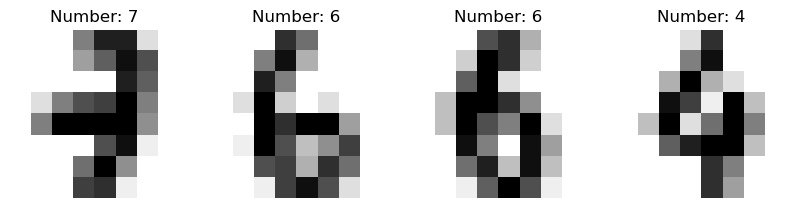

In [4]:
import matplotlib.pyplot as plt
from random import randint

_, axes = plt.subplots(nrows = 1, ncols = 4, figsize=(10, 3))
for ax in axes:
    num = randint(1, 1000)
    image = digit_dataset["images"][num]
    label = digit_dataset["target"][num]
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title("Number: %i" % label)

In [5]:
from sklearn.model_selection import train_test_split
X = digit_dataset["data"]
Y = digit_dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [6]:
print(X.shape , X_train.shape, X_test.shape)

(1797, 64) (1347, 64) (450, 64)


In [7]:
from sklearn.linear_model import LogisticRegression
logreg_ovr = LogisticRegression(multi_class = "ovr")
logreg_softmax = LogisticRegression(multi_class = "multinomial", solver = "sag")

# model fit
logreg_ovr.fit(X_train, Y_train)
logreg_softmax.fit(X_train, Y_train)

/home/ubnt/miniconda3/envs/my_project/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubnt/miniconda3/envs/my_project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Y_pred_ovr = logreg_ovr.predict(X_test)
Y_pred_softmax = logreg_softmax.predict(X_test)

print("ovr model :")
print(confusion_matrix(Y_test, Y_pred_ovr))
print("softmax model : ")
print(confusion_matrix(Y_test, Y_pred_softmax))


ovr model :
[[39  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  1  1]
 [ 0  0 46  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  2  0]
 [ 0  0  0  0 36  0  0  1  1  0]
 [ 0  0  1  0  0 34  0  1  1  1]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 45  1  1]
 [ 0  2  1  0  0  1  0  0 38  0]
 [ 0  0  0  0  0  1  0  0  0 44]]
softmax model : 
[[39  0  0  0  0  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  1]
 [ 0  0 46  0  0  0  0  0  0  0]
 [ 0  0  1 50  0  0  0  0  1  0]
 [ 0  0  0  0 36  0  0  1  1  0]
 [ 0  0  1  0  1 34  1  0  0  1]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  2]
 [ 0  2  1  0  0  0  0  0 38  1]
 [ 0  0  0  0  0  0  0  0  0 45]]


In [9]:
print("ovr model : ")
print(f"classification_report \n{classification_report(Y_test, Y_pred_ovr)}")
print("softmax model : ")
print(f"classification_report \n{classification_report(Y_test, Y_pred_softmax)}")

ovr model : 
classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      0.97      0.97        63
           2       0.96      1.00      0.98        46
           3       1.00      0.96      0.98        52
           4       1.00      0.95      0.97        38
           5       0.94      0.89      0.92        38
           6       1.00      1.00      1.00        40
           7       0.96      0.96      0.96        47
           8       0.86      0.90      0.88        42
           9       0.94      0.98      0.96        45

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450

softmax model : 
classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      0.98      0.98        63
  

In [10]:
print("ovr model : ")
print(f"accuracy_score : {accuracy_score(Y_test, Y_pred_ovr)}")
print("softmax model : ")
print(f"accuracy_score : {accuracy_score(Y_test, Y_pred_softmax)}")

result = confusion_matrix(Y_test, Y_pred_ovr)
result.diagonal().sum() / result.sum()

ovr model : 
accuracy_score : 0.9622222222222222
softmax model : 
accuracy_score : 0.9666666666666667


0.9622222222222222

In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_ovr, pos_label=1)

In [21]:
roc_auc = auc(fpr, tpr)
roc_auc

0.1281120544686436

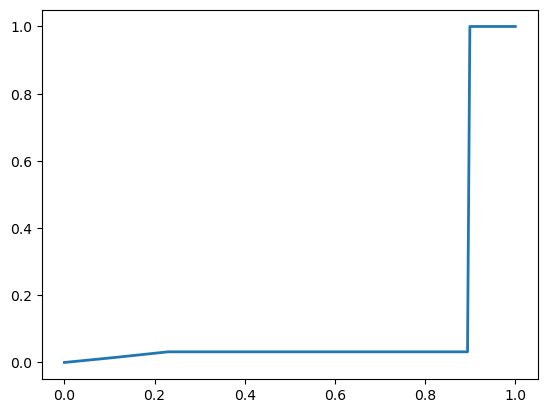

In [13]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=lw, label="ROC curve ")
plt.show()